In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as ss
from matplotlib.ticker import NullFormatter

In [3]:
def doubling(x,n):
    if n == 0:
        return x
    elif n == 1:
        return 2*x*(x <= 1/2) + (2*x - 1)*(x >= 1/2)
    else:
        return doubling(doubling(x,n-1),1)

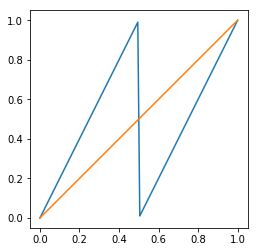

In [4]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 1, 100)
ax.set_ylim([0,1])
ax.set_xlim([0,1])
ax.plot(x, doubling(x,1));
ax.plot(x, x);
ax.axis('square')
plt.savefig('doubling.png')

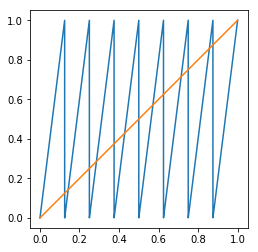

In [5]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 1, 10000)
ax.set_ylim([0,1])
ax.set_xlim([0,1])

ax.plot(x, doubling(x,3));
ax.plot(x, x);
ax.axis('square')
plt.savefig('doubling_iterates.png')

In [7]:
def birkh(x,f,n):
    S = 0
    for i in range(n):
        S += f(doubling(x,i))
    return S

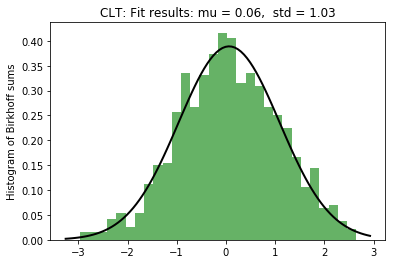

In [12]:
def rho(x):
    return (3*x*np.sin(10*np.pi*x) + 4)/(4 - 3/(10*np.pi))

var_rho = (15*(-3 + 40*np.pi**2))/(4*(3 - 40*np.pi)**2)
sample_size = 1000
num_iter = 50

sample = np.random.uniform(0,1,sample_size)
B = (birkh(sample,rho,num_iter) - num_iter)/(np.sqrt(num_iter*var_rho))
plt.hist(B, bins=30, density=True, alpha=0.6, color='g')

mu, std = norm.fit(B)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.ylabel('Histogram of Birkhoff sums')
title = "CLT: Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.savefig('clt.png')
plt.show()



In [14]:
def plot_ld(n):
    sample = np.random.uniform(0,1,1000)
    B = np.abs(birkh(sample,rho,n)/n - 1)
    B_close = B[B > epsilon]
    B_away = B[B <= epsilon]
    plt.hist(B_away, bins=30,   alpha=0.6, color='b')
    plt.hist(B_close, bins=30,   alpha=0.6, color='g')
    plt.title('n = %d' % n)

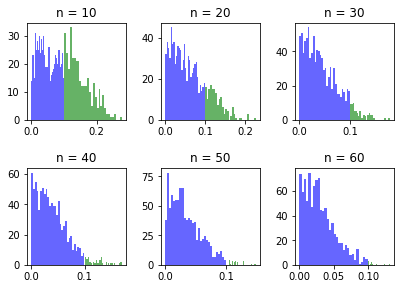

In [18]:
plt.figure(1)
epsilon = 0.1

plt.figure(1)
plt.subplot(231)
plot_ld(10)

plt.subplot(232)
plot_ld(20)

plt.subplot(233)
plot_ld(30)

plt.subplot(234)
plot_ld(40)

plt.subplot(235)
plot_ld(50)

plt.subplot(236)
plot_ld(60)


plt.gca().yaxis.set_minor_formatter(NullFormatter())
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5,
                    wspace=0.35)
plt.savefig('ld_hist.png')
plt.show()

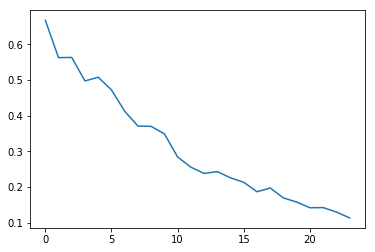

In [19]:
n = 25
L = []
epsilon = 0.1
sample_size = 2000

for i in range(1,n):
    sample = np.random.uniform(0,1,sample_size)
    B = np.abs(birkh(sample,rho,i)/i - 1) - epsilon 
    L.append((np.sum(B > 0))/len(B))


plt.plot(L)
plt.savefig('ld_decay.png')
plt.show()

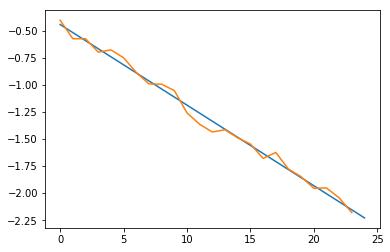

In [20]:
z = np.polyfit(range(0,n-1), np.log(L), 1)
p = np.poly1d(z)
plt.plot(p(range(n)))

plt.plot(np.log(L))
plt.savefig('ld_log_decay.png')
plt.show()